# Load Dataset

In this notebook, we will load the dataset and display some plots to understand its statistics.


In [1]:
import re
import pandas as pd
import seaborn as sns
from rich import print
from datasets import load_dataset
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import sentence_tokenize as sent_tokenize

In [2]:
sns.set_theme(context="notebook", style="dark")

In [3]:
data_ckpt, sub_data = "wikimedia/wikipedia", "20231101.ar"

In [4]:
ds = load_dataset(data_ckpt, sub_data, split="train")

In [5]:
print(ds)

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 1219201
})

In [6]:
print(ds.features)

{
    'id': Value(dtype='string', id=None),
    'url': Value(dtype='string', id=None),
    'title': Value(dtype='string', id=None),
    'text': Value(dtype='string', id=None)
}

In [7]:
print(ds.info)

DatasetInfo(
    description='',
    citation='',
    homepage='',
    license='',
    features={
        'id': Value(dtype='string', id=None),
        'url': Value(dtype='string', id=None),
        'title': Value(dtype='string', id=None),
        'text': Value(dtype='string', id=None)
    },
    post_processed=None,
    supervised_keys=None,
    builder_name='parquet',
    dataset_name='wikipedia',
    config_name='20231101.ar',
    version=0.0.0,
    splits={
        'train': SplitInfo(
            name='train',
            num_bytes=3124486159,
            num_examples=1219201,
            shard_lengths=[78000, 134172, 216172, 270344, 331171, 158171, 31171],
            dataset_name='wikipedia'
        )
    },
    download_checksums={
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00000-of-0000
7.parquet': {
            'num_bytes': 408241089,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00001-of-0000
7.parquet': {
            'num_bytes': 172208447,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00002-of-0000
7.parquet': {
            'num_bytes': 144792516,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00003-of-0000
7.parquet': {
            'num_bytes': 130751823,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00004-of-0000
7.parquet': {
            'num_bytes': 65094867,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00005-of-0000
7.parquet': {
            'num_bytes': 156441726,
            'checksum': None
        },
        'hf://datasets/wikimedia/wikipedia@b04c8d1ceb2f5cd4588862100d08de323dccfbaa/20231101.ar/train-00006-of-0000
7.parquet': {
            'num_bytes': 245773803,
            'checksum': None
        }
    },
    download_size=1323304271,
    post_processing_size=None,
    dataset_size=3124486159,
    size_in_bytes=4447790430
)

In [8]:
text = ds[0]["text"]
print(text)

الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع
الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها
ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة
يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة
الغليان، وتسمّى بخار الماء.

إنّ الماء هو أساس وجود الحياة على كوكب الأرض، وهو يغطّي 71% من سطحها، وتمثّل مياه البحار والمحيطات أكبر نسبة للماء على
الأرض، حيث تبلغ حوالي 96.5%. وتتوزّع النسب الباقية بين المياه الجوفيّة وبين جليد المناطق القطبيّة (1.7% لكليهما)، مع
وجود نسبة صغيرة على شكل بخار ماء معلّق في الهواء على هيئة سحاب (غيوم)، وأحياناً أخرى على هيئة ضباب أو ندى، بالإضافة
إلى الزخات المطريّة أو الثلجيّة. تبلغ نسبة الماء العذب حوالي 2.5% فقط من الماء الموجود على الأرض، وأغلب هذه الكمّيّة
(حوالي 99%) موجودة في الكتل الجليديّة في المناطق القطبيّة، في حين تتواجد 0.3% من الماء العذب في الأنهار والبحيرات وفي
الغلاف الجوّي.

أما في الطبيعة، فتتغيّر حالة الماء بين الحالات الثلاثة للمادة على سطح الأرض باستمرار من خلال ما يعرف باسم الدورة 
المائيّة (أو دورة الماء)، والتي تتضمّن حدوث تبخّر ونتح (نتح تبخّري) ثم تكثيف فهطول ثم جريان لتصل إلى المصبّ في المسطّحات
المائيّة.

شكّل الحصول على مصدر نقي من مياه الشرب أمراً مهمّاً لنشوء الحضارات عبر التاريخ. وفي العقود الأخيرة، سجلت حالات شحّ في
المياه العذبة في مناطق عديدة من العالم، ولقد قدّرت إحصاءات الأمم المتّحدة أنّ حوالي مليار شخص على سطح الأرض لا يزالون
يفتقرون الوسائل المتاحة للوصول إلى مصدر آمن لمياه الشرب، وأنّ حوالي 2.5 مليار يفتقرون إلى وسيلة ملائمة من أجل تطهير
المياه.

الخواص الفيزيائية والكيميائية 

يمكن إيراد الخواص الكيميائيّة والفيزيائيّة الأساسيّة للماء على شكل النقاط التالية:
 الماء سائل عند ظروف الضغط والحرارة القياسيّة المحيطة وذلك عند 298.15 كلفن (25 °س) وضغط 100,000 باسكال (1 بار، 14.5
بساي، 0.99 جو)، وهو عديم المذاق، كما أنّه عديم اللون عندما يكون بكمّيّات صغيرة، إلّا أنّه يأخذ لوناً أزرق عند ازدياد عمق
الطبقات، وتلك خاصّيّة في أصل وجوهر الماء، ويعود سببها إلى امتصاص انتقائي في المجال الأحمر من الطيف المرئي وتبعثر 
للضوء الأبيض، أمّا بخار الماء فهو أساساً غاز عديم اللون.
 تتكون بنية الماء الجزيئيّة نظريّاً بحيث تقع ذرّة الأكسجين في مركز بنية جزيئيّة رباعيّة السطوح تقع فيها ذرّتا الهيدروجين
بالإضافة إلى الزوجين الإلكترونيّين (الموجودين على ذرّة الأكسجين) على زوايا الشكل رباعي السطوح. ولكنّ الشائع أنّ البنية
الجزيئيّة للماء منحنية وغير خطّيّة، إذ تبلغ زاوية الرابطة H-O-H مقدار 104.45°. تلك القيمة من زاوية الرابطة أصغر من 
القيمة النظاميّة لرباعي السطوح 109.47، ويعود ذلك إلى تدافع الزوجين الإلكترونيين ليشغلا أبعد مسافة ممكنة عن بعضهما 
حسب نظرية فيسبر. يبلغ طول الرابطة O-H في جزيء الماء 95.84 بيكومتر.

 بما أنّ كهرسلبية ذرّة الأكسجين حسب مقياس باولنغ (3.5) أعلى من ذرّة الهيدروجين (2.1)، تحمل ذرّة الأكسجين شحنة سالبة
جزئية؛ في حين تحمل ذرّة الهيدروجين شحنة موجبة جزئية، بالتالي يكون الماء جزيئاً قطبيّاً ذا عزم ثنائي قطب يبلغ مقداره
1.84 ديباي. يستطيع الماء على أساس ذلك أن يشكّل روابط هيدروجينيّة بين جزيئيّة. تؤدّي هذه العوامل إلى وجود قوّة ترابط بين
جزيئيّة قويّة، ممّا يفسّر ظهور خاصّيّة التوتّر السطحي الكبيرة للماء، بالإضافة إلى الخاصّيّة الشعريّة. تفسّر خاصّيّة التوتّر
السطحي للماء ظاهرة إمكانيّة وقوف الحشرات خفيفة الوزن على سطح الماء، بالإضافة إلى إمكانيّة تشكّل القطرات؛ في حين أنّ
الخاصّيّة الشعريّة، والتي تشير إلى ميل الماء إلى الصعود إلى أعلى أنبوب شعري رفيع بشكل معاكس لقوة الجاذبية، خاصية مهمة
وحيوية عند النباتات الوعائية مثل الأشجار.
 يعدّ الماء من المذيبات القطبيّة الجيّدة، وعادةً ما يشار إليه على أنّه «مذيب عام». تُعرَّف المواد الكيميائيّة القابلة
للانحلال (الذوبان) في الماء بأنّها مواد محبّة للماء (هيدروفيليّة)، مثل الأملاح والسكّريّات والأحماض والقلويّات وبعض
الغازات مثل الأكسجين وثنائي أكسيد الكربون. بالمقابل، تعرّف المواد الكيميائيّة التي تكون غير قابلة للامتزاج مع الماء
(مثل الدهنيّات (الزيوت والشحوم وغيرها) بأنّها كارهة للماء (هيدروفوبيّة). من جهة أخرى يمتزج الماء مع العديد من السوائل
كالكح

In [9]:
for p in text.split("\n\n"):
    print(p)
    print("-" * 100)

الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع
الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها
ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة
يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة
الغليان، وتسمّى بخار الماء.

----------------------------------------------------------------------------------------------------

إنّ الماء هو أساس وجود الحياة على كوكب الأرض، وهو يغطّي 71% من سطحها، وتمثّل مياه البحار والمحيطات أكبر نسبة للماء على
الأرض، حيث تبلغ حوالي 96.5%. وتتوزّع النسب الباقية بين المياه الجوفيّة وبين جليد المناطق القطبيّة (1.7% لكليهما)، مع
وجود نسبة صغيرة على شكل بخار ماء معلّق في الهواء على هيئة سحاب (غيوم)، وأحياناً أخرى على هيئة ضباب أو ندى، بالإضافة
إلى الزخات المطريّة أو الثلجيّة. تبلغ نسبة الماء العذب حوالي 2.5% فقط من الماء الموجود على الأرض، وأغلب هذه الكمّيّة
(حوالي 99%) موجودة في الكتل الجليديّة في المناطق القطبيّة، في حين تتواجد 0.3% من الماء العذب في الأنهار والبحيرات وفي
الغلاف الجوّي.

----------------------------------------------------------------------------------------------------

أما في الطبيعة، فتتغيّر حالة الماء بين الحالات الثلاثة للمادة على سطح الأرض باستمرار من خلال ما يعرف باسم الدورة 
المائيّة (أو دورة الماء)، والتي تتضمّن حدوث تبخّر ونتح (نتح تبخّري) ثم تكثيف فهطول ثم جريان لتصل إلى المصبّ في المسطّحات
المائيّة.

----------------------------------------------------------------------------------------------------

شكّل الحصول على مصدر نقي من مياه الشرب أمراً مهمّاً لنشوء الحضارات عبر التاريخ. وفي العقود الأخيرة، سجلت حالات شحّ في
المياه العذبة في مناطق عديدة من العالم، ولقد قدّرت إحصاءات الأمم المتّحدة أنّ حوالي مليار شخص على سطح الأرض لا يزالون
يفتقرون الوسائل المتاحة للوصول إلى مصدر آمن لمياه الشرب، وأنّ حوالي 2.5 مليار يفتقرون إلى وسيلة ملائمة من أجل تطهير
المياه.

----------------------------------------------------------------------------------------------------

الخواص الفيزيائية والكيميائية

----------------------------------------------------------------------------------------------------

يمكن إيراد الخواص الكيميائيّة والفيزيائيّة الأساسيّة للماء على شكل النقاط التالية:
 الماء سائل عند ظروف الضغط والحرارة القياسيّة المحيطة وذلك عند 298.15 كلفن (25 °س) وضغط 100,000 باسكال (1 بار، 14.5
بساي، 0.99 جو)، وهو عديم المذاق، كما أنّه عديم اللون عندما يكون بكمّيّات صغيرة، إلّا أنّه يأخذ لوناً أزرق عند ازدياد عمق
الطبقات، وتلك خاصّيّة في أصل وجوهر الماء، ويعود سببها إلى امتصاص انتقائي في المجال الأحمر من الطيف المرئي وتبعثر 
للضوء الأبيض، أمّا بخار الماء فهو أساساً غاز عديم اللون.
 تتكون بنية الماء الجزيئيّة نظريّاً بحيث تقع ذرّة الأكسجين في مركز بنية جزيئيّة رباعيّة السطوح تقع فيها ذرّتا الهيدروجين
بالإضافة إلى الزوجين الإلكترونيّين (الموجودين على ذرّة الأكسجين) على زوايا الشكل رباعي السطوح. ولكنّ الشائع أنّ البنية
الجزيئيّة للماء منحنية وغير خطّيّة، إذ تبلغ زاوية الرابطة H-O-H مقدار 104.45°. تلك القيمة من زاوية الرابطة أصغر من 
القيمة النظاميّة لرباعي السطوح 109.47، ويعود ذلك إلى تدافع الزوجين الإلكترونيين ليشغلا أبعد مسافة ممكنة عن بعضهما 
حسب نظرية فيسبر. يبلغ طول الرابطة O-H في جزيء الماء 95.84 بيكومتر.

----------------------------------------------------------------------------------------------------

بما أنّ كهرسلبية ذرّة الأكسجين حسب مقياس باولنغ (3.5) أعلى من ذرّة الهيدروجين (2.1)، تحمل ذرّة الأكسجين شحنة سالبة
جزئية؛ في حين تحمل ذرّة الهيدروجين شحنة موجبة جزئية، بالتالي يكون الماء جزيئاً قطبيّاً ذا عزم ثنائي قطب يبلغ مقداره
1.84 ديباي. يستطيع الماء على أساس ذلك أن يشكّل روابط هيدروجينيّة بين جزيئيّة. تؤدّي هذه العوامل إلى وجود قوّة ترابط بين
جزيئيّة قويّة، ممّا يفسّر ظهور خاصّيّة التوتّر السطحي الكبيرة للماء، بالإضافة إلى الخاصّيّة الشعريّة. تفسّر خاصّيّة التوتّر
السطحي للماء ظاهرة إمكانيّة وقوف الحشرات خفيفة الوزن على سطح الماء، بالإضافة إلى إمكانيّة تشكّل القطرات؛ في حين أنّ
الخاصّيّة الشعريّة، والتي تشير إلى ميل الماء إلى الصعود إلى أعلى أنبوب شعري رفيع بشكل معاكس لقوة الجاذبية، خاصية مهمة
وحيوية عند النباتات الوعائية مثل الأشجار.
 يعدّ الماء من المذيبات القطبيّة الجيّدة، وعادةً ما يشار إليه على أنّه «مذيب عام». تُعرَّف المواد الكيميائيّة القابلة
للانحلال (الذوبان) في الماء بأنّها مواد محبّة للماء (هيدروفيليّة)، مثل الأملاح والسكّريّات والأحماض والقلويّات وبعض
الغازات مثل الأكسجين وثنائي أكسيد الكربون. بالمقابل، تعرّف المواد الكيميائيّة التي تكون غير قابلة للامتزاج مع الماء
(مثل الدهنيّات (الزيوت والشحوم وغيرها) بأنّها كارهة للماء (هيدروفوبيّة). من جهة أخرى يمتزج الماء مع العديد من السوائل
كالكحولات (الإيثانول مثلاً) بكافة النسب مشكّلاً مزيجاً له صفات معيّنة، منها كونه ثابت الغليان (مزيج أزيوتروبي). ولكن
بالمقابل لا يمتزج الماء مع أغلب الزيوت العضويّة، إذ تشكّل الأخيرة طبقة ذات كثافة أقل تطفو على سطح الماء.

----------------------------------------------------------------------------------------------------

تعتمد قيمة نقطة غليان الماء (كما هو الحال في كافة السوائل) على قيمة الضغط الجوّي المحيط. على سبيل المثال، فإنّ الماء
النقيّ يغلي عند مستوى سطح البحر عند الدرجة 100 °س، في حين أنّه يغلي عند الدرجة 68 °س عند قمّة جبل إيفرست (8,848 م فوق
سطح البحر). عند إذابة المواد القابلة للانحلال في الماء ترتفع نقطة غليان الماء وتنخفض نقطة تجمّده.
 تبلغ قيمة السعة الحراريّة النوعيّة للماء 4181.3 جول/(كغ·كلفن)، وهي قيمة مرتفعة نسبياً بالمقارنة مع باقي المركّبات 
الكيميائيّة، كما أنّ حرارة التبخّر لديه مرتفعة (2257 كيلوجول/كغ) أيضاً. يعود ارتفاع هذه القيم إلى الروابط الهيدروجينيّة
بين جزيئات الماء. تساهم تلك القيم المرتفعة في جعل مناخ الأرض معتدلاً وذلك بامتصاص التباينات والتأرجحات الكبيرة في 
درجة الحرارة.
 للماء كثافة مقدارها 1000 كغ/م3 (تعادل 1 غ/مل) عند الدرجة 4° س، أمّا الجليد فكثافته تبلغ 917 كغ/م3. تكون لكثافة 
الماء قيمة أعظمية عند الدرجة 3.98 °س، وبعد ذلك تميل للتناقص، وذلك على العكس من أغلب المواد النقيّة الأخرى، والتي 
تزداد كثافتها عندما تنخفض درجة حرارتها. يعود التناقص في قيمة الكثافة إلى البنية المفتوحة غير المتراصّة للجليد والذي
يبدأ بالتشكّل تدريجيّاً في الماء ذي درجة الحرارة المنخفضة (دون 3.98 °س)، إذ لا توجد طاقة حرارية كافية لتأمين توجّهات
الحركة العشوائيّة للجزيئات، ممّا يؤدّي إلى اصطفافها على المستوى الجزيئي ولكن ببنية مفتوحة منتظمة، ممّا يؤدّي إلى ازدياد
الحجم العام للسائل؛ ولذلك فإنّه بين درجتي الحرارة 3.98 °س و 0 °س يزداد الحجم مع تناقص درجة الحرارة. يتمدّد الماء 
ليشغل حجماً أكبر بنسبة 9% من حجم الجليد، بالتالي ستكون كثافة الجليد أقلّ من كثافة الماء، لذلك يطفو الجليد على سطح 
الماء السائل، كما هو الحال في الجبال الجليديّة.
 للماء النقي موصليّة كهربائيّة ضعيفة، ولكنّها تزداد عند إذابة كمّيّة قليلة من مادّة أيونيّة مثل كلوريد الصوديوم.
 عند تطبيق طاقة كافية على الماء تفوق كمّيّة الحرارة القياسيّة للتكوين والتي تبلغ 285.8 كيلوجول/مول (15.9 ميغاجول/كغ)
يحدث عندئذ انفصال لجزيء الماء إلى مكوّناته من الهيدروجين والأكسجين، وهذا ما يحدث عند تطبيق جهد مرتفع من التيّار 
الكهربائي بشروط معيّنة للحصول على ظاهرة التحليل الكهربائي للماء. إنّ الطاقة اللازمة لفصل الماء إلى الهيدروجين 
والأكسجين عبر التحليل الكهربائي أو وسيلة أخرى تفوق الطاقة المستحصلة من تفاعل اتحاد العنصرين المذكورين. يمكن أن يتم 
التحليل الكهربائي للماء على مستوى تعليمي عبر جهاز هوفمان لتحليل الماء:

----------------------------------------------------------------------------------------------------

يصنّف الماء كيميائيّاً على أنّه أكسيد للهيدروجين، وهو يتشكّل عندما يحترق الهيدروجين أو أيّ مركّب حاوٍ عليه بالأكسجين، وهو
مزيج انفجاري. تستطيع العناصر الكيميائيّة الأكثر كهرسلبية من الهيدروجين مثل الليثيوم والصوديوم والكالسيوم والبوتاسيوم
والسيزيوم أن تزيح الهيدروجين من الماء مشكّلة بذلك الهيدروكسيدات الموافقة.
 يوصف الماء بأنّه عَسِر عندما تكون نسبة الأملاح المعدنيّة في الماء عالية، وخاصّة أملاح الكالسيوم (Ca+2) والمغنسيوم 
(Mg+2)، بالإضافة إلى بعض الأملاح المنحلّة من البيكربونات والكبريتات. بالمقابل، يوصف الماء غير العسر أنه «ماء يَسِر»،
ويختلف تعريفه حسب الدولة، فهو الذي تركيزه من الأملاح أخفض من 100 مغ/ل في المملكة المتّحدة، وأخفض من 60 مغ/ل في 
الولايات المتّحدة الأمريكيّة. لهذه الخاصّيّة أهمّيّة في الصناعة بشكل خاص وخاصة في المراجل عند التبخير، كما أنّ لها تأثير
على الصحّة، لذلك تخضع عادة إلى عملية إزالة للعسر.
 يمكن إجراء تفاعل كشف عن الماء بأساليب لاعضويّة تقليديّة، إذ أنّ الماء يلوّن ملح كبريتات النحاس الثنائي اللامائي أبيض
اللون إلى اللون الأزرق، كما يتحوّل لون الورق المشبّع بملح كلوريد الكوبالت الثنائي اللامائي من الأزرق إلى الأحمر عند
التماس مع الماء. أمّا تحليليّلاً فتحدّد كمّيّة الماء باستخدام طريقة كارل-فيشر.
 التعادل الحمضي: الماء سائل متعادل كيميائيّاً، إذ أنّ درجة الحموضة أو القاعدية فيه هي 7، وهذا يعني أنّه لا يمكن اعتبار
الماء مادّة حمضيّة أو قاعديّة، لأنه مادّة متعادلة كيميائيّاً.
 حسب توزّع نظائر الهيدروجين وتركيبها فيمكن لجزيء الماء أن يكون بالإضافة إلى الشكل الشائع «الخفيف» على شكل ماء ثقيل 
عندما يكون نظير الهيدروجين الديوتيريوم مكان الأول في جزيء الماء (D2O)، كما يمكن أن يكون على الشكل ماء فائق الثقل 
عندما يحلّ التريتيوم مكان الهيدروجين في جزيء الماء (T2O).

----------------------------------------------------------------------------------------------------

الماء في الكون

----------------------------------------------------------------------------------------------------

باستثناء الماء الموجود على سطح الأرض، فإنّ معظم الماء الموجود في الكون هو نتاج ثانوي لولادة النجوم، والتي يترافق 
حدوثها بنشوء رياح تندفع خارجاً بقوّة، حاملةً معها الغاز والغبار. عندما يصطدم ذلك الدفق من المواد بالغاز المحيط بالجرم
المولود يؤدّي ذلك إلى نشوء أمواج صدمة، ما يعمل على تسخين الغاز. يتشكل الماء الملاحظ في الكون بتلك الطريقة وبشكل سريع
في ذلك الغاز المتكاثف الساخن. ظهر في سنة 2011 تقرير عن اكتشاف سحابة هائلة من بخار الماء في الكون وبكمّيّات تفوق 
الكمّيّة الموجودة على الأرض ب 140 تريليون مرّة، في محيط نجم زائف يبعد حوالي 12 مليار سنة ضوئيّة عن الأرض. وقد استنتج من
ذلك أنّ الماء موجود في الكون منذ بداية نشأته.

----------------------------------------------------------------------------------------------------

يوجد الماء في الكون على العموم بحالاته الثلاثة الصلبة، والسائلة، والغازيّة، بالإضافة لإمكانيّة افتراضيّة لوجوده على
شكل يدعى «ماء فائق التأيّن»، حيث يتبلور الأكسجين وتبقى أيونات الهيدروجين عائمةً بشكل حرّ داخل الشبكة البلوريّة 
للأكسجين. يوجد هذا الشكل افتراضياً تحت ضغط ودرجة حرارة كبيرين كما هو الحال في البنية الداخليّة لكوكبي أورانوس ونبتون.
يعد وجود الماء بحالاته الثلاثة في نفس الوقت أحد أسباب وجود الحياة على سطح كوكب الأرض. ويرجع ذلك لموقع الأرض في 
النطاق الصالح للحياة في النظام الشمسي، بحيث لو أنّها كانت أقرب إلى الشمس أو أبعد منها بنسبة 5% من المسافة الحاليّة 
(أي حوالي 8 ملايين كم) فإنّ الظروف التي تسمح بوجود الأشكال الثلاثة لن تكون متوفّرة، ممّا سيؤثّر على وجود الحياة.

----------------------------------------------------------------------------------------------------

على شكل بخار ماء 
يوجد الماء بحالته الغازيّة على هيئة بخار ماء، وقد عثر في الكون على هذا الشكل من الماء في الغلاف الجوّي للعديد من 
الأجرام في مجرّة درب التبّانة؛ وذلك في كلّ من:

----------------------------------------------------------------------------------------------------

الغلاف الجوّي للشمس وذلك بكمّيّات نزرة قابلة للقياس.
 الغلاف الجوّي لعطارد بنسبة 3.4%، ولكن توجد كمّيّات أكبر في الغلاف الخارجي.
 الغلاف الجوّي للزهرة بنسبة 0.002%.
 الغلاف الجوّي للأرض بنسبة تقارب 0.40% بالنسبة لكامل طبقات الغلاف الجوّي، إلّا أنّها تتراوح بين 1-4% بالقرب من السطح،
بالإضافة إلى وجود كمّيّات نزرة في الغلاف الجوّي للقمر.
 الغلاف الجوّي للمريخ بنسبة 0.03 %.
 الغلاف الجوّي للمشتري وذلك فقط في المواد المتطايرة بنسبة 0.0004%، وكذلك في قمره أوروبا.
 الغلاف الجوّي لزحل وذلك فقط في المواد المتطايرة، وكذلك في أقماره تيتان وديون وإنسيلادوس.
 الغلاف الجوّي لأورانوس بكمّيّات نزرة دون 50 بار.
 الغلاف الجوّي لنبتون وذلك في الطبقات العميقة.

----------------------------------------------------------------------------------------------------

يوجد بخار الماء أيضاً في العديد من الأجرام الفلكيّة الأخرى داخل المجموعة الشمسيّة كما في الغلاف الجوي للكوكب القزم 
سيريس، بالإضافة إلى الأجرام خارج المجموعة الشمسيّة بما في ذلك الغلاف الجوّي لكل من HD 189733 b، وHD 209458 b، و Tau
Boötis b، و HAT-P-11b، و XO-1b، وواسب-12b و WASP-17b و WASP-19b.

----------------------------------------------------------------------------------------------------

يوجد بخار الماء أيضاً في الغلاف الجوّي للنجوم وذلك بشكل لا يقتصر على النجوم الباردة فقط، إذ أنّه اكتشف حتى في النجوم
الضخمة العملاقة مثل منكب الجوزاء ونجم الراقص في كوكبة الملتهب وقلب العقرب والسمّاك الرامح. كما اكتشف بخار الماء أيضاً
في الأقراص النجميّة الدوّارة بما في ذلك أكثر من نصف نجوم تي الثور مثل AA Tauri، و TW Hydrae، و IRC +10216، و APM 
08279+5255، و S Persei.

----------------------------------------------------------------------------------------------------

على شكل ماء سائل

----------------------------------------------------------------------------------------------------

يوجد الماء السائل في الكون بشكل رئيسي على كوكب الأرض حيث يغطّي أكثر من 71% من مساحته، بالإضافة إلى ذلك توجد كمّيّات
كبيرة من الماء داخل الأرض وذلك في الطبقات العميقة تحت القشرة الأرضيّة. كما أنّ هناك دلائل على وجوده على سطح المريخ 
أيضاً ولكن بكمّيّات قليلة. هناك أبحاث تشير إلى أنّ الماء السائل قد يوجد بكمّيّات معتبرة في قمر إنسيلادوس الذي يدور في فلك
زحل، حيث توجد طبقة سماكتها حوالي 10 كم في عمق 30-40 كم تحت سطح القطب الجنوبي لذلك القمر، كما يوجد في طبقة تحت سطح 
قمر تيتان، ومن المحتمل أن يكون ممزوجاً مع الأمونيا. أمّا قمر المشتري أوروبا فلسطحه ميّزات تشير إلى إمكانيّة وجود مياه
محيط سائلة تحت سطحيّة، كما يمكن للماء السائل أن يوجد على قمر المشتري غانيميد في طبقة محصورة بين الجليد مرتفع الضغط 
والصخر.

----------------------------------------------------------------------------------------------------

على شكل جليد 
يوجد الماء على شكل جليد في الكون في العديد من الأجرام والكواكب مثل كوكب المريخ وذلك تحت الحطام الصخري وعند القطبين،
كما يوجد في حلقات زحل، وفي قطبي عطارد.

----------------------------------------------------------------------------------------------------

كما يوجد الجليد على شكل صفائح جليديّة في الأرض وفي الفوّهات والصخور البركانيّة في القمر، وفي أقمار أخرى مثل قمر شارون.

----------------------------------------------------------------------------------------------------

الماء في الأرض

----------------------------------------------------------------------------------------------------

يوجد الماء على سطح الأرض في المسطّحات المائيّة والتي يمكن أن تكون على عدّة أشكال طبيعيّة مثل المحيطات والبحار والبحيرات
والأنهار والجداول والبرك وغير ذلك، مع العلم أنّ أغلب الماء الموجود على سطح الأرض هو على شكل مياه مالحة في المحيطات 
والبحار، وخاصة في نصف الأرض الجنوبي حيث يوجد نصف الكرة المائي. تعرف كمّيّة الماء الكلّيّة الموجودة على الأرض ككلّ باسم
غلاف الأرض المائي، ويقدّر حجمه بحوالي 1338 مليون كم3، ومعظم هذه الكمّيّة (97%) عبارة عن ماء مالح في المحيطات، أما 3%
المتبقيّة، والتي تكافئ حوالي 48 مليون كم3 فهي ماء عذب، وحوالي ثلثي الماء العذب المتوفّر على الأرض هو جليد في القطبين
على شكل مثالج وجبال جليديّة. تشكّل المياه الجوفيّة أغلب نسبة الثلث المتبقي من المياه العذبة (23.4 مليون كم3)، بحيث أنّ
النسبة المتبقيّة من الماء العذب الموجودة في مجاري الأنهار وفي البحيرات الداخليّة (190 ألف كم3) وفي الغلاف الجوّي على
شكل بخار ماء (13 ألف كم3) وفي الغلاف الصخري (16 ألف كم3) تبدو صغيرة نسبيّاً. إنّ أغلب ماء الأرض هو على شكل سائل 
(98.2%)، والباقي على شكل صلب (1.8 %)، مع وجود نسبة ضئيلة (0.001 %) على شكل بخار ماء. تجدر الإشارة إلى أنّ هذه النسب
تقريبيّة وتشير إلى الحالة الراهنة، إذ حدثت تفاوتات كبيرة في تاريخ مناخ الكرة الأرضيّة.

----------------------------------------------------------------------------------------------------

دورة الماء

----------------------------------------------------------------------------------------------------

يشير مصطلح دورة الماء إلى التغيّر المستمرّ لحالات الماء ضمن الغلاف المائي للأرض وذلك بين الغلاف الجوّي للأرض والتربة
والمياه السطحيّة والجوفيّة، بالإضافة إلى دور النباتات في تلك العمليّة.

----------------------------------------------------------------------------------------------------

تتضمّن دورة الماء انتقال الماء بشكل مستمر ودون انقطاع عبر العمليّات التالية:
 تبخّر الماء من المحيطات والمسطّحات المائيّة، بالإضافة إلى عمليّة النتح من نباتات اليابسة على شكل بخار ماء إلى الهواء.
 تكاثف بخار الماء من الهواء وحدوث هطولات تضمن عودة الماء بالتساقط على الأرض.
 جريان وصولاً إلى المحيطات والمسطّحات المائيّة.

----------------------------------------------------------------------------------------------------

يتكاثف أغلب بخار الماء الموجود فوق المحيطات ويعود إليها، ولكن أحياناً ما تحمل الرياح بخار الماء إلى اليابسة بحيث 
يمكن أن يحدث الهطول والتساقط عليها، وهذا الأمر يتعلّق بالمنطقة الجغرافيّة ومناخ المنطقة. يمكن للهطولات أن تكون على 
أشكال مختلفة، أشهرها الهطولات المطريّة، ولكن قد يحدث الهطول على شكل ثلج أو بَرَد، كما يسهم تشكل الضباب والندى في عملية
الهطول أيضاً. بالمقابل، يحدث القحط والجفاف عندما تمرّ فترات زمنيّة طويلة نسبيّاً قد تصل لشهور وأحياناً لسنوات دون هطول،
ممّا يؤدّي إلى نقصان في مخزونها المائي تحت المعدّل الطبيعي لتلك المنطقة الجغرافيّة.

----------------------------------------------------------------------------------------------------

عند حدوث جريان الماء تتجمّع المياه على شكل مستجمعات، والتي تنجرف إلى الأنهار ومنها تكمل طريقها حسب مصبّها إلى 
المحيطات أو تتبخّر منها مباشرة. يعرف نموذج النقل الهيدرولوجي بأنّه إجراء عمليّة نمذجة رياضيّة لمحاكاة تدفّق نهر أو جدول،
وحساب العوامل المؤثّرة على جودة الماء. يمكن أن يؤدّي الجريان إلى تعرية البيئة المحيطة ممّا يؤدّي إلى تشكيل الوديان أو
مناطق جغرافية مميّزة وخصبة مثل الدلتا على سبيل المثال. يحدث الفيضان عندما تهطل كمّيّة كبيرة من الأمطار الغزيرة على 
أراضي منبسطة، بحيث أنّ معدّل الهطول في فترة زمنية يكون أكبر من معدّل التصريف، ممّا يؤدّي إلى ارتفاع مستوى المياه في
الأنهار وغمرها للمناطق المحيطة.

----------------------------------------------------------------------------------------------------

التأثير على المناخ 
يقوم الماء بدور محوري في التأثير على مناخ الأرض، وهو أساس كافّة الظواهر المتعلّقة بالطقس وحالة الجوّ، ويعود ذلك إلى
خاصّيّة الماء المتميّزة والمتمثّلة بالحركيّة والسعة الحراريّة العالية. يتمّ تخزين طاقة الشمس في مياه المحيطات، حيث يؤدّي
ذلك إلى تبخّر المياه، إلّا أنّ نسبة التعرّض للشمس تتفاوت من مكان لآخر حسب المنطقة الجغرافيّة، ممّا يؤدّي إلى تفاوت في درجة
حرارة المياه وفي نسبة الملوحة، والذي يسبّب في النهاية بحدوث تيّارات محيطيّة تنقل معها كمّيّات كبيرة من الطاقة (على شكل
حرارة)، مثل تيار الخليج وتيار همبولت. إنّ حدوث تيار الخليج الدافئ له تأثير كبير على مناخ أوروبا، إذ لولاه لكان 
المناخ هناك قطبياً.

----------------------------------------------------------------------------------------------------

عندما تسخن مياه المحيطات يتبخّر الماء، وينتج نوعان من بخار الماء: «الجافّ» غير المتكاثف و«الرطب» المتكاثف على شكل 
سحاب وضباب، والذي يحوي وينقل الطاقة على شكل حرارة كامنة، والتي لها تأثير كبير على الظواهر الجوّية مثل الرطوبة الجوّيّة
والعواصف الرعديّة.

----------------------------------------------------------------------------------------------------

تؤدّي الهطولات المطريّة و/أو الثلجيّة إلى تأمين المحتوى المائي في المناطق الجغرافيّة، وتكون نسبة النتح التبخرّي إلى
الهطولات مهمّة في تحديد مناخ المنطقة الجغرافيّة إن كانت قاحلة (سهوب وصحاري) أو رطبة (غابات)، وذلك للتأثير المباشر على
الغطاء النباتي.

----------------------------------------------------------------------------------------------------

ماء البحر والمد والجزر

----------------------------------------------------------------------------------------------------

يحوي ماء البحر على نسبة من الأملاح الطبيعيّة (ما متوسطه 3.5%، أكثرها وفرةً ملح كلوريد الصوديوم)، بالإضافة إلى كمّيّات
أصغر من مواد أخرى. تتراوح نسبة الملوحة في مياه البحار من 0.7% في بحر البلطيق إلى 4.0% في البحر الأحمر، في حين تصل 
نسبة الأملاح في البحر الميّت إلى حوالي 35%.

----------------------------------------------------------------------------------------------------

يسمّى ارتفاع منسوب مياه البحر عند الشاطئ وانحساره باسم ظاهرة المدّ والجزر على الترتيب. ويعود سببها إلى قوّة ناشئة 
ومتولّدة عن قوّة جاذبيّة القمر والشمس، والتي تؤثّر على مياه المحيطات. يؤدّي حدوث ظاهرة المدّ والجزر إلى تغيّر في عمق
المسطّحات المائيّة المجاورة للشواطئ وخاصة عند مصاب الأنهار، ممّا يؤدّي إلى حدوث تيّارات اهتزازيّة تعرف باسم المجاري
المدّيّة. إنّ التغيّر في منسوب مياه البحر أثناء المدّ والجزر في مكان جغرافي ما يتعلّق بحركة القمر والشمس ووموقعهما في
لحظة معيّنة بالنسبة للأرض، ويترافق ذلك مع تأثير كوريوليس الحاصل من دوران الأرض حول نفسها، بالإضافة إلى العامل 
المتعلّق بمدى عمق تلك النقطة الجغرافيّة. تسمّى المنطقة الساحليّة التي تغمر تحت تأثير المدّ وينحسر عنها الماء أثناء الجزر
باسم البحر الوحلي، وهي منطقة ذات أهمّيّة بيئيّة كبيرة.

----------------------------------------------------------------------------------------------------

الماء وعلوم الأرض 
يعرف العلم الذي يعنى بدراسة المياه وتوزيعها فوق الأرض وصفاتها وخواصها الطبيعيّة والكيميائيّة وتفاعلها مع البيئة 
والكائنات الحيّة باسم علم المياه، في حين أنّ علم وصف المياه يختصّ بدراسة التوزيع والحركة على الأرض، أمّا دراسة المياه
الجوفيّة من حيث التوزيع والحركة فهو علم الهيدروجيولوجيا. في حال كان التخصّص في دراسة الجليد فيعرف العلم باسم علم 
الجليد، وفي حال التخصّص بالمياه الداخلية فيعرف العلم باسم علم المسطّحات المائيّة الداخليّة، أمّا دراسة توزّع الماء في
المحيطات والخواص المتعلّقة فهو مجال اهتمام علم المحيطات.

----------------------------------------------------------------------------------------------------

يدخل الماء في العديد من العمليّات الجيولوجيّة المهمّة، حيث يوجد الماء في العديد من الصخور، ويؤثّر ذلك في تشكيل الصدوع،
كما يسهم الماء في حدوث عمليّات التجوية الكيميائيّة والفيزيائيّة. تستطيع مياه الأمطار أن تتخلّل بعض أنواع الصخور المشكّلة
للقشرة الأرضيّة بحيث تصل إلى طبقات المياه الجوفية. عندما تكون المياه الجوفيّة الموجودة في أعماق الأرض ضمن طبقات 
جيولوجيّة ساخنة فإنّ الماء يصعد إلى سطح الأرض على شكل مياه حمئة أو فوّارات حارّة.

----------------------------------------------------------------------------------------------------

الأهمّيّة الحيويّة

----------------------------------------------------------------------------------------------------

الماء هو الحياة، ويمكن تفسير تلك المقولة من وجهة حيويّة بناءً على عدة خواص مميّزة يقوم بها الماء، والتي هي أساسيّة 
لاستمرار الحياة على وجه الأرض. من بين تلك الخواص الحيويّة قيامه بدور مذيب عام، إذ أنّ أغلب المواد الحيويّة تكون مذابة
أو معلّقة فيه، ولهذا الأمر أهمّيّة في العمليّات الاستقلابيّة، كما يشكّل الماء وسطاً حيوياً يسمح بقيام تفاعلات عضويّة حيويّة
تؤدّي في النهاية إلى تأمين التناسخ الذاتي، ممّا يضمن استمرار التناسل وبقاء الكائنات الحية.

----------------------------------------------------------------------------------------------------

يعدّ الماء أساسيّاً لحدوث عملية التركيب الضوئي وبالتالي التنفس الخلوي عند الكائنات الحيّة. تقوم خلايا النباتات أثناء
عمليّة التركيب الضوئي باستخدام طاقة الشمس لفصم الهيدروجين عن الأكسجين في جزيء الماء، حيث يتحدّ الهيدروجين مع ثنائي 
أكسيد الكربون CO2 ليشكّل الغلوكوز ويحرّر الأكسجين. بالمقابل تستخدم الكائنات الحيّة الأكسجين لتحرق السكر (الكربوهيدرات
بشكل عام) لتحرر الماء وغاز ثنائي أكسيد الكربون من أجل تأمين الطاقة لاستمرار الحياة. للماء أيضاً دور مهمّ في تأمين وسط
معتدل أس هيدروجيني ~ 7، وبالتالي في عمل الإنزيمات. بالنهاية تحتاج كلّ الكائنات الحيّة إلى كمّيّات من الماء للقيام 
بعمليّاتها الحيويّة، مثل التخلص من الفضلات على سبيل المثال.

----------------------------------------------------------------------------------------------------

الماء أساس الحياة

----------------------------------------------------------------------------------------------------

بدأت أول أشكال الحياة في الماء ومنها تطوّرت إلى أشكال الحياة المعروفة الآن. من الأمثلة المعروفة على أشكال الحياة 
البدائيّة وجود نوع من بكتيريا مختزلة للكبريت وهي بدائيّة النواة وذاتيّة التغذية وتنتج الطاقة من حدوث تفاعل 
أكسدة-اختزال بين كبريتيد الهيدروجين وثنائي أكسيد الكربون بوجود أشعة الشمس ممّا أسهم في الحصول على منتجات للكربون 
بالإضافة إلى الماء.

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

تلا ذلك وجود البكتريا الزرقاء وجميع أنواع حقيقيّات النوى ذاتيّة التغذية التي استخدمت الماء وثنائي أكسيد الكربون في 
تفاعل إنتاج الطاقة بوجود الضوء للحصول على الأكسجين والسكّر:

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

من خلال هذه العمليّة ارتفع منسوب غاز الأكسجين في الماء وفي الغلاف الجوّي، وبذلك أصبح من الممكن الحصول على الطاقة عن
طريق التنفّس الخلوي.

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

على هذا الأساس أصبح الماء هو الوسط الرئيسي في جميع الكائنات الحيّة من أجل تمام عمليات الاستقلاب الكيميائيّة الحيويّة
للحصول على الطاقة وتخزينها. ويتمثّل ذلك في العمليّات الحيويّة التالية: التركيب الضوئي وتحلّل السكّر وتحلّل الدهن ودورة
حمض الستريك ودورة اليوريا. يعود الفضل في ذلك إلى كون الماء من المذيبات القطبيّة ممّا يسهم في إذابة الإلكتروليتات 
والمركّبّات القطبيّة، ومن جهة أخرى تسهم لزوجة وكثافة الماء الملائمة في كونه وسطاً ناقلاً للمركّبات اللاقطبيّة غير القابلة
للذوبان في الماء، مثل المغذّيّات والدهون ونتائج التقويض والهدم الاستقلابي والهرمونات. بالتالي فالماء هو أساس الأوساط
الناقلة مثل الدم والبلازما واللمف عند الثديّيات والنسيج الوعائي الخشبي عند النباتات.

----------------------------------------------------------------------------------------------------

يقوم الماء بالإضافة إلى ذلك في ضبط حرارة جسم الكائنات الحيّة وذلك على شكل إدماع (تعرّق النبات) أو على شكل عَرَق عند
البشر والحيوانات. من جهة أخرى تستخدم النباتات وبعض الحيوانات اللافقارية ظاهرة ضغط الامتلاء (أو ضغط الانتباج) 
بالاعتماد على امتلاء محتوى الخليّة بالماء للقيام بتحريك بسيط للأعضاء. تلاحظ هذه الظاهرة لدى بعض النباتات عند تحريك 
الأوراق، كما تلاحظ أيضاً عند شوكيات الجلد مثل قنفذ البحر ونجم البحر وخيار البحر.

----------------------------------------------------------------------------------------------------

الحياة المائيّة

----------------------------------------------------------------------------------------------------

تزخر مياه الأرض السطحيّة بعدّة أشكال من التنوّع الحيوي فيها، وتتناقص كلما ازداد العمق. تعتمد الحياة المائيّة في البحار
والمحيطات في وجودها على الماء كعامل أساسي للكتلة الحيويّة، ويكون العامل المحدّد للإنتاجيّة هو كمّيّة ومقدار المغذّيّات
النباتيّة المذابة مثل الفوسفات ومركّبات النتروجين مثل الأمونيوم والنترات بالإضافة إلى ثنائي أكسيد الكربون CO2.

----------------------------------------------------------------------------------------------------

تنمو بعض النباتات في الماء مثل الطحالب وتعدّ أساساً للعديد من النظم البيئيّة تحت سطح الماء؛ كما تعيش العوالق 
(البلانكتون) أيضاً تحت سطح الماء، وهي متعضّيّات صغيرة جداً، وهي ذات أهمّيّة بالغة، إذ تعدّ الأساس في وجود السلسلة الغذائيّة
في المحيطات. إنّ أوّل ظهور للشكل البدائي للحياة كان في الماء؛ مع وجود أصناف عديدة من الأسماك والعديد من اللافقاريات
التي تعيش في الماء فقط بالإضافة إلى وجود البرمائيّات والتي تقضي حياتها بين اليابسة والمياه. يستمر التدرّج في كبر وحجم
الأنواع حتى الوصول إلى الثديّيات البحريّة.

----------------------------------------------------------------------------------------------------

تحتاج الفقاريّات المائيّة إلى الأكسجين لحياتها، وهي تفعل ذلك بطرق مختلفة. للأسماك مثلاً خياشيم بدلاً من الرئتين والتي
تتمكّن من خلالها أن تعيش تحت الماء، رغم أنّه يتوفّر لدى بعض الأسماك مثل الأسماك الرئويّة كلا نظامي التنفّس. أمّا الثديّيات
البحريّة مثل الدلفين والحوت وثعالب الماء وزعنفيّات الأقدام فهي تحتاج للصعود إلى السطح بشكل دوري لتنفّس الهواء. تقوم
بعض البرمائيّات بالتنفّس عن طريق امتصاص الأكسجين من خلال جلدها. تمتلك اللافقاريّات العديد من التحويرات كي تبقى على قيد
الحياة في بيئات ذات مياه فقيرة بالأكسجين وذلك باستخدام أنابيب تنفّس مثلاً.

----------------------------------------------------------------------------------------------------

يؤدّي تعلّق كثافة الماء بدرجة الحرارة إلى حدوث ظاهرة التطبُّق وإلى حدوث تيّارات مائيّة داخل كتلة الماء الموجودة في المسطّح
المائي، والتي تعد ذات أهمّيّة كبيرة للموائل والأمكنة الحيوية في المياه العذبة وفي مياه المحيطات المالحة على حد سواء.
إن شذوذ الكثافة لدى الماء يمكّن الكائنات البحريّة من البقاء على قيد الحياة في فصل الشتاء، إذ أنّ البيئات المائيّة بذلك
لن تهبط عند التجمّد إلى القاع إنّما ستطفو على السطح.

----------------------------------------------------------------------------------------------------

الحياة البريّة 
يعدّ الماء أساسيّاً وعاملاً محدّداً للإنتاجية في النظم البيئيّة على الأرض، إذ أنّه ضروري الوجود من أجل عمليّة الاستقلاب عند
الأحياء (الغلاف الحيوي)، كما له دور أساسي في تشكيل وتطبيع أماكن تواجدها، إن كان في غلاف الأرض الترابي أو الجوّي. 
تقوم الهطولات المطريّة و/أو الثلجيّة بتغذية المسطّحات المائيّة والمياه الجوفيّة كمصدر حيوي من أجل نمو النباتات ولتأمين
مياه شرب للحيوانات.

----------------------------------------------------------------------------------------------------

يتم الاستفادة من خواص الماء من قبل العديد من الكائنات الحيّة، فعلى سبيل المثال تستغل الحشرات والعنكبيّات خاصّيّة التوتّر
السطحي للماء في حياتها اليوميّة بشكل كبير.

----------------------------------------------------------------------------------------------------

الإنسان

----------------------------------------------------------------------------------------------------

إنّ حوالي ثلثي جسم الإنسان وزناً هو ماء، ممّا يبرز الأهمّيّة الحيويّة له بالنسبة لبقاء البشريّة. تتراوح نسبة الماء في
الجسم بين 55% إلى 78% وذلك حسب الحجم. عندما تنقص كمّيّة الماء في الجسم يشعر الإنسان بالعطش؛ إذ لا يستطيع الإنسان أن
يعيش دون شرب ماء لفترة طويلة. يؤدّي نقصان كمّيّة الماء في الجسم إلى آثار صحّيّة سلبيّة كبيرة، مثل حدوث التجفاف، ممّا يؤدّي
إلى تعطّل بعض وظائف الجسم التي تحتاج الماء كي تعمل بانتظام. يؤدّي عدم شرب كمّيّات كافية من الماء إلى حدوث شعور بالدوار
والغثيان، واضطرابات في التروية الدموية، بالإضافة إلى تشنّجات عضليّة.

----------------------------------------------------------------------------------------------------

تتفاوت التقديرات حول الكمّيّة الموصى بها لشرب الماء يوميّاً، ولكن لا ينبغي أن تقل عن 1.5 ليتر من الماء يوميّاً، وهي كمّيّة
تقديريّة وسطيّة لتجنّب حدوث الجفاف (6-7 كاسات من الماء يوميّاً). وللآن لا توجد أدلّة علميّة كافية تلزم الإنسان بشرب كمّيّة
محدّدة من الماء يوميّاً، مثل القول أنه ينبغي شرب 8 كاسات من الماء كلّ يوم. من جهة أخرى، هناك عدد من الدراسات التي ربطت
بين الاستهلاك المرتفع لماء الشرب مع حدوث اضطرابات ومشاكل في الوزن. ربّما تزداد الكمّيّة الموصى بها حسب المناخ، ففي 
البلدان ذات المناخ الحارّ يرتفع الطلب اليومي على شرب الماء، كما تزداد حاجة الجسم إلى الماء عند مزاولة جهد عضلي مثل 
الرياضة. بالمقابل، يؤدّي شرب كمّيّات فائضة من الماء عن الحاجة بشكل مبالغ يزيد عن 20 ليتر في اليوم إلى حدوث تسمّم بالماء
وذلك بسبب حدوث اختلال توازن الكهرليتات ونقصان كمّيّة الأملاح في الجسم، وخاصّة نقص صوديوم الدم، ممّا يؤدّي إلى حدوث حالة
تلف دائم في الخلايا العصبيّة تنتهي بالوفاة.

----------------------------------------------------------------------------------------------------

الأهمّيّة بالنسبة للحضارة البشريّة

----------------------------------------------------------------------------------------------------

للماء دور حيوي في بقاء وتقدّم الحضارة الإنسانيّة؛ حيث ازدهرت الحضارات البشريّة عبر العصور في وديان الأنهار الكبيرة 
الرئيسيّة؛ كما هو الحال في حضارة بلاد الرافدين، والتي تعرف باسم مهد الحضارة، إذ أنّها شهدت ازدهار عدّة حضارات وذلك 
بسبب الموقع الجغرافي المتميّز بين نهري دجلة والفرات، وقيل أنّها سمّيّت بالعراق أي «الشاطئ» لكثرة ووفرة مياهها، التي
شكلت عامل جذب للعديد من الأقوام الذين سكنوها وشادوا فيها أرقى الحضارات. كما أنّ حضارة المصريّين القدماء كانت قد تركّزت
على ضفاف مجرى نهر النيل. بالإضافة إلى وادي السند في الهند وباكستان، ووادي هوانج في الصين. أنشأت كلّ هذه الحضارات 
أنظمة ريّ ساهمت في تطوير الأرض وجعلتها منتجة. وقد انهارت الحضارات حين نضوب موارد المياه أو عند إساءة استخدامها؛ إذ 
يعتقد كثير من المؤرّخين أنّ سقوط حضارة السومريّين في بلاد ما بين النهرين كان بسبب ضعف المهارة والخبرة في عمليّات الريّ.
فقد تركّز الملح من مياه الريّ في الأرض بعد تبخّر المياه وأخذ يتراكم في التربة. وكان من الممكن تفادي تركّز الملح في 
التربة بغسل الملح بماء إضافي، وإذا لم يتمّ صرف ماء الأرض تصبح مشبّعة بالماء. فشل السومريون في تحقيق التوازن اللازم 
بين تركّز الملح في التربة وبين عمليات صرف المياه منها، وأدّت زيادة تركّز الملح في التربة وكذلك تشبّعها بالماء إلى 
الإضرار بالمحاصيل. ومن ثم انخفض الناتج الزراعي تدريجيّاً وتفاقم نقص الغذاء، ومع انهيار الزراعة انهارت الحضارة 
السومريّة.

----------------------------------------------------------------------------------------------------

هناك عدد جيّد من حواضر المدن الكبيرة في العصر الحديث والتي يعود جزء من نجاحها إلى الموقع الجغرافي المائي المميّز، 
الذي يمكّن من الحركة التجاريّة كما هو الحال في هونغ كونغ وطوكيو وشنغهاي وروتردام ومونتريال.

----------------------------------------------------------------------------------------------------

يستخدم الماء العذب بشكل رئيسي في المجتمعات البشريّة كمصدر آمن لمياه الشرب، بالإضافة إلى استخدامه في قضاء الحاجات 
المنزليّة الأساسيّة فيما يخصّ الطبخ والنظافة الخاصّة والاستحمام. أمّا على صعيد خارجي فسيتخدم الماء بشكل أساسي في 
الزراعة، وخاصة من أجل الريّ، وكذلك في الصناعة وخاصة صناعة الغذاء.

----------------------------------------------------------------------------------------------------

تاريخ استخدام الماء

----------------------------------------------------------------------------------------------------

منذ فجر الحضارة البشريّة أولى الإنسان أهمّيّة كبيرة لتطوير وسائل وطرق من أجل جلب المياه وتخزينها وذلك للأهمّيّة الحيويّة
الكبيرة لهذه المادّة في حياة الإنسان. خلال العصر الحجري الحديث تمكّن الإنسان لأوّل مرة من حفر الآبار الدائمة، حيث كان
يرفع الماء إلى الأعلى باستخدام الشادوف أو السواقي أو النواعير. كما انتشرت الآبار المدرّجة في عدّة مناطق في الهند، 
بالإضافة إلى وجود نظام تصريف معقّد للمياه في بعض المناطق في شبه القارة الهنديّة، كما هو الحال في موهينجو دارو في 
حضارة وادي السند. كما عثر على نظام تصريف متقن للمياه أيضاً في آثار سكارا براي في إسكتلندا، والتي تعود إلى العصر 
الحجري الحديث.

----------------------------------------------------------------------------------------------------

كانت حضارة الإغريق القدماء في كريت، والتي تعرف باسم الحضارة المينوسيّة، من أوائل الحضارات التي استخدمت أنابيب من 
الخزف من أجل تزويد وتصريف المياه. كما استخدم الإغريق في اليونان والأناضول نظام تصريف منزلي على شكل رشّاشات مضغوطة 
لغرض الاستحمام. شقّ الرومان القدماء قنوات لجرّ الماء، وأنشأوا القنوات والخزّانات المائيّة في أرجاء إمبراطوريّتهم، ولا
تزال العديد من الآثار الرومانيّة في مجال صرف المياه حاضرةً في العديد من الدول العربيّة على سبيل المثال في بلاد الشام
وعلى طول ساحل الشمال الإفريقي. تمكّن الرومان بذلك من إنشاء نظام لجلب وتصريف المياه للمنازل وفي الساحات العامّة، حيث
صمّمت النوافير والسبل العامّة. استخدم الرومان قديماً الرصاص لصنع الأنابيب، ممّا أدّى إلى انتشار حدوث حالات من تسمّم
الرصاص في ذلك الوقت. حفر الفرس أيضاً القنوات المائيّة في المدن والبلدات، كما قاموا ببناء خزّانات من اللِّبْن تدعى باسم
«آب انبار».

----------------------------------------------------------------------------------------------------

استمرّ التوسّع في شقّ القنوات وحفر الآبار مع ازدهار الحضارة الإسلاميّة، ومع التوسّع في إنشاء المواضئ في المساجد لأداء
الصلوات، كما أنشئت الترع وحفرت العيون في الطرق والسبل العامّة، كما هو الحال في عين زبيدة التي حفرت خصيصاً للحجاج. 
بالإضافة إلى ذلك انتشر براعة المهندسون في الأندلس على وجه الخصوص في تصميم النوافير وإيجاد حيل هندسيّة أضفت لمسات 
بديعة في فنّ العمارة كما هو الحال في نافورة بهو السباع في قصر الحمراء في غرناطة.

----------------------------------------------------------------------------------------------------

كان التطوّر في تقنيّات استخدام المياه متزامناً في عدد من الحضارات، حيث تمكّن شعب المايا في بالينكي من تطوير قنوات مائيّة
تحت أرضيّة ومن تصميم نظام تصريف شبيه بنظام المرحاض الحديث. مع تقدّم العلوم والتطوّر في مواد البناء وعلوم الهندسة، 
بالإضافة إلى تحديث أساليب معالجة المياه أصبح من الممكن توفير أشكال مناسبة لتخزين المياه وتمديدها إلى البيوت وأماكن 
الإقامة، بحيث أصبح الوصول إليها سهلاً في العديد من المدن المتحضّرة.

----------------------------------------------------------------------------------------------------

الاستخدامات الأساسيّة

----------------------------------------------------------------------------------------------------

الاستخدامات المنزليّة

----------------------------------------------------------------------------------------------------

يستخدم الماء على صعيد منزلي للشرب والطبخ والاستحمام ولغسل الملابس بشكل أساسي. يعني مفهوم صناعة المياه تزويد ماء 
الشرب وخدمات الصرف الصحي (بما في ذلك معالجة الصرف الصحي) إلى المنازل بوسائل مختلفة. تتضمّن الوسائل التي تؤمّن إمداد
المياه كل من الآبار والخزّانات الأرضيّة من أجل الحصاد المائي والتخزين بواسطة خزّانات وأبراج المياه والتغذية عن طريق
شبكات وأنابيب المياه بالإضافة إلى وسائل تنقية المياه. تتولّى بلديّات المدن مسؤولية توزيع المياه للاستخدامات المنزليّة
أو يمكن أن يتم الأمر عن طريق صهاريج. لغرض الترشيد في الموارد المائيّة العذبة تقوم بعض المدن مثل هونغ كونغ باستخدام 
مياه البحر دون معالجة من أجل شطف المراحيض في المنازل والمرافق العامّة.

----------------------------------------------------------------------------------------------------

كان ماء الشرب في السابق يجمع عادةً من الينابيع والجداول أو من حفر الآبار أو بضخّه من البحيرات والأنهار. في العصر 
الراهن يتطلّب الأمر معالجة المياه وتنقيتها لإزالة الشوائب باستخدام مرشّحات المياه والتي تكون عادة من الرمل، كما يتطلّب
الأمر أيضاً تعقيم المياه للتخلّص من المواد الضارّة المنحلّة والميكروبات وذلك باستخدام كلورة المياه أو أساليب أخرى. يمكن
معالجة المياه أيضاً باستخدام التناضح العكسي أو بتحلية مياه البحر.

----------------------------------------------------------------------------------------------------

يمثّل الماء أمراً جوهرياً فيما يخص أمور النظافة بشكل عام والنظافة الشخصيّة بشكل خاص، وذلك فيما يتعلّق بالاستحمام وغسل
الملابس وتنظيف المنازل بالإضافة إلى جلي الأواني، حيث يستخدم لذلك بالإضافة إلى الماء الصابون والمواد المنظّفة 
الملائمة. كما يعدّ الماء أساسيّاً للطبخ حيث يستخدم بطرق مختلفة من أجل تحضير الطعام وذلك إمّا بسلق الخضار والبيض في ماء
مغلي، أو بإجراء الطهي عن طريق التبخير، أو السلق على نار هادئة، أو بالغلي عند درجات حرارة تقارب نقطة غليان الماء.

----------------------------------------------------------------------------------------------------

الزراعة

----------------------------------------------------------------------------------------------------

يعد الري الاستخدام الأهمّ للماء في الزراعة، وهو أساسي لإنتاج المحاصيل الغذائيّة. قد يصل سحب الماء من أجل ريّ المزروعات
في بعض البلدان الناميّة إلى حوالي 90% من السحب الإجمالي، وحتى في الدول المتقدّمة تصل نسبة سحب المياه من أجل الريّ إلى
نسبة معتبرة، إذ أنّه في الولايات المتّحدة الأمريكيّة تصل نسبة السحب من المياه العذبة من أجل الري إلى حوالي 30%.

----------------------------------------------------------------------------------------------------

ازدادت أهمّيّة الوعي حول الترشيد في استخدام الموارد المائيّة في العقود الأخيرة، خاصّة مع ازدياد عدد سكان الأرض وازدياد
حاجتهم بالتالي إلى الماء للشرب وللري للحصول على الغذاء، ممّا دعا إلى حاجة تطوير وسائل مثل الري بالتنقيط. أدّى التمدّد
الحضري بالإضافة إلى ارتفاع الطلب على المياه من قطاعات أخرى، مثل إنتاج الطاقة البديلة (الوقود الحيوي)، إلى الحديث عن
مفهوم ذروة الماء. يتوقّع في المستقبل أن يزداد الطلب على الماء بشكل أكبر ممّا هو عليه الآن وذلك لتأمين غذاء كاف مع 
تزايد عدد سكان الأرض، والذي يخمّن أن يصل إلى 9 بلايين في حلول سنة 2050.

----------------------------------------------------------------------------------------------------

أجري تقييم لأسلوب إدارة المياه في الاستخدام الزراعي سنة 2007 من طرف المعهد الدولي لإدارة المياه في سريلانكا من أجل 
معرفة إن كان للعالم موارد من الماء كافيّة لتأمين الغذاء للعدد المتزايد من السكان في العالم. قامت عملية التقييم على 
أساس وفرة المصادر المائيّة في تلك السنة لاستخدامها في الزراعة على صعيد العالم، وقدّمت تحديداً للمواقع التي تعاني من
ندرة المياه، حيث وجد أن خمس تعداد السكان في العالم، أي أكثر من 1.2 مليار نسمة، يعيشون في مناطق تعاني من ندرة مادّيّة
للمياه حيث لا توجد كمّيّة كافية من الماء لتلبية كافّة الحاجيّات الضروريّة. كما وجد أنّ 1.6 مليار نسمة في العالم يعيشون في
مناطق ندرة اقتصاديّة للمياه، حيث أنّ نقص الاستثمارات وضعف الحالة الاقتصاديّة يجعل من المستحيل على الهيئات الحكوميّة في
تلك المناطق أن تلبّي حاجة الطلب إلى المياه. خلص التقرير إلى أنّ الاستمرار على نفس الوتيرة الحاليّة من إنتاج الغذاء 
واستخدام مياه الري من أجل زراعة المحاصيل ستؤدّي بالنهاية إلى حدوث أزمات في العديد من المناطق في العالم، وأنّه يمكّن
تجنّب ذلك عندما يقوم المزارعون بزيادة الكفاءة والإنتاجيّة وذلك بالتقليل قدر الإمكان من الهدر بالترشيد واستخدام وسائل
حديثة في الريّ.

----------------------------------------------------------------------------------------------------

الصناعة 
للماء أهمّيّة كبيرة في الصناعة وله العديد من التطبيقات. يستخدم الماء بشكل أساسي كمادّة تبريد ووسط في المبادلات 
الحراريّة نظراً لوفرته وللسعة الحراريّة المرتفعة سواءً للتبريد أو التسخين. يمكن الحصول على الماء البارد من مصادر طبيعيّة
متوفّرة كنهر جار أو بحيرة قريبة أو من البحر، كما أن تسخين الماء لنقل الحرارة عمليّة فعّالة عن طريق تبخير وتكثيف الماء
وذلك بسبب حرارة التبخر العالية له. بالمقابل، إنّ من سيّئات استخدام البخار هو تعرّض المواد المعدنيّة المستخدمة في 
الصناعة مثل الفولاذ والنحاس للتآكل عند استخدام ماء غير معالج. في كافّة المحطّات الحراريّة يكون الماء هو السائل 
المستخدم لنقل الحرارة بدخوله في دورة مغلقة بين المرجل والعنفات والمكثّف، كما يستخدم أيضاً كمادّة حراريّة ناقلة في أبراج
التبريد. في المحطّات والمفاعلات النوويّة يستخدم الماء كمهدّئ للنيوترونات وكمادّة تبريد في نفس الوقت.

----------------------------------------------------------------------------------------------------

يدخل الماء العديد من التطبيقات المهمّة في الصناعات الكيميائيّة وذلك على شكل مذيب أو كاشف كيميائي؛ كما يستخدم في مختلف
العمليّات الكيميائيّة كوسط للتفاعل على العموم وعلى الخصوص من أجل التنظيف والشطف (عادة مع مواد منظّفة أو محاليل قلويّة)
أو للإذابة أو للاستخلاص ولإعادة التبلور. كما يستخدم الماء كوسط من أجل التحليل والطلي الكهربائي وفي صناعة البطّاريات.

----------------------------------------------------------------------------------------------------

في العمليّات التقنيّة المختلفة يستخدم الماء كوسط لربط وتشكيل الجبس والإسمنت، بالإضافة إلى استخدامه في التصديع والقطع
والتنظيف عندما يوضع تحت ضغط مرتفع، بالإضافة إلى استخدامه كوسط لنقل الضغط في بعض التطبيقات الهيدروليكيّة.

----------------------------------------------------------------------------------------------------

يستفاد من الطاقة المائيّة على هيئة طاقة كهرمائيّة في توليد الكهرباء، وذلك من القوّة الناشئة عن دفع المياه للعنفات التي
تكون موصولة بمولّد كهربائي. تعدّ الطاقة الكهرمائية إحدى الطاقات النظيفة المتجدّدة، والتي يحصل عليها عادة من إنشاء 
السدود على الأنهار.

----------------------------------------------------------------------------------------------------

التجارة والنقل

----------------------------------------------------------------------------------------------------

تستخدم المعابر المائيّة كوسيلة لنقل البضائع وللسفر. كان السفر في الماضي بواسطة السفن لغرض الاستكشاف والتجارة وسيلة 
أساسيّة لقطع المسافات البعيدة التي تفصل بينها البحار. في الوقت الحالي يقتصر السفر بواسطة السفن الكبيرة لغرض السياحة،
في حين أنّ النصيب الأكبر من حركة السفن في الوقت الحالي هو لغرض تجاري. تمتاز بعض المعابر المائية بموقع إستراتيجي 
يمنحها أهمّيّة تجاريّة كبيرة مثل قناة السويس وقناة بنما.

----------------------------------------------------------------------------------------------------

يدرج في الوقت الحالي استخدام الماء كسلعة تجاريّة، إذ تتمّ في بعض المناطق شراء الحقوق التجاريّة لينابيع وجداول المياه
المعدنيّة العذبة أو المياه الجوفيّة وتعبئتها في قارورة (قنينة) زجاجيّة أو بلاستيكيّة وبيعها على هيئة مياه معبّأة، قد
تكون أحياناً مكربنة (فوّارة) بإضافة غاز ثنائي أكسيد الكربون إليها. ينتشر استخدام المياه المعبّأة بشكل أساسي في البلدان
التي تعاني من شحّ في الموارد الطبيعيّة للمياه العذبة، ممّا أدى إلى انتشار مفهوم «خصخصة المياه».

----------------------------------------------------------------------------------------------------

مع قلّة الموارد المائيّة واضطرار الدول الناميّة إلى تصدير المنتجات الزراعيّة التي استخدمت المياه العذبة لريّها؛ ظهر
مفهوم الماء الافتراضي، وهو الكمّيّة المستهلكة من المياه لإنتاج محصول زراعي معيّن. على سبيل المثال يتطلّب 1600 متر مكعّب
من الماء وسطيّاً لإنتاج طن واحد من القمح. يفيد هذا المفهوم في ضرورة معرفة اختيار نوع المحاصيل الزراعيّة وتصنيفها إلى
التي ينبغي زراعتها وتصديرها والتي ينبغي استيرادها.

----------------------------------------------------------------------------------------------------

استخدامات أخرى

----------------------------------------------------------------------------------------------------

مكافحة الحريق

----------------------------------------------------------------------------------------------------

يستخدم الماء من أجل مكافحة الحريق وذلك بسبب وفرته وخموله الكيميائي النسبي ولارتفاع حرارة التبخّر. يعود التأثير 
الإخمادي للماء بسبب استهلاك الطاقة الناتجة عن تفاعل الاحتراق في تبخيره وتحويله إلى بخار ماء وبذلك يخمد الحريق. 
بالمقابل ينبغي تجنّب استخدام الماء عند إخماد حرائق الزيوت والوقود والمذيبات العضويّة، إذ أنّه في تلك الحالة يستخدم 
مطافئ الحريق التي تعتمد على حجب الأكسجين.

----------------------------------------------------------------------------------------------------

لدى استخدام الماء في إخماد الحرائق ينبغي الأخذ بالحسبان مخاطر حدوث انفجار بخاري، والذي يعود سببه إلى فرط الإحماء في
زمن قصير وتشكّل كمّيّات كبيرة من البخار في حيّز مكاني ضيق. كما ينبغي توخّي الحذر من حدوث انفجارات بسبب غاز الهيدروجين
الناتج عن تفكّك الماء، والذي يحدث عندما يستخدم الماء لإطفاء حرائق مواد قابلة للتفاعل معه؛ مثل حرائق الفلزّات والفحم.

----------------------------------------------------------------------------------------------------

استخدامات علميّة 
استخدم الماء في السابق كأساس لتعريف وحدة الوزن الغرام، وذلك سنة 1795 في فرنسا، إذ عُرّف حينها أنّه يساوي «الوزن المطلق
لحجم ماء نقي مساو لحجم مكعّب طول ضلعه واحد على المئة من المتر عند درجة حرارة ذوبان الجليد». لدوافع عمليّة ارتأى 
العلماء آنذاك صنع مقياس معدني كتلته أكبر بألف مرة، وهو الكيلوغرام. كما تمّ الاعتماد على النقطة الثلاثيّة للماء في 
تعريف مقياس كلفن لدرجة الحرارة، وبذلك نشأ مفهوم درجة الحرارة المطلقة، والتي لها نفس مقياس درجات سيلزيوس ولكن تجعل 
نقطة تجمد الماء (0 °س) عند 273.15 كلفن. يتكوّن الماء الطبيعي من نظائر هيدروجين-1 وأكسجين-16، ولكن هناك كمّيّات ضئيلة
من النظائر الأثقل لعنصري الهيدروجين والأكسجين والتي تدخل في تركيب الماء الثقيل، ممّا قد يؤثّر على خواص الماء. ممّا 
استدعى من الهيئات العلميّة وضع مقياس أو معيار اتّفق عليه وسمّي باسم معيار فيينا لمياه المحيط.

----------------------------------------------------------------------------------------------------

للماء دور هام ومحوري في مجال علم الغذاء، ويستخدم للتعبير عن ذلك مفهوم النشاط المائي (أو فاعليّة الماء). تؤثّر المواد
المذابة في الماء على النشاط المائي، ممّا يؤثّر في النهاية على التفاعلات الكيميائيّة وعلى نموّ الميكروبات في الطعام.
يعرّف النشاط المائي على أنّه نسبة ضغط البخار الجزئي للماء في المادّة الاستهلاكيّة إلى ضغط البخار للماء النقي. يفيد 
معرفة النشاط المائي للأغذية في معرفة كيفيّة حفظ الأغذية ووقايتها من الميكروبات وفي تقدير فترة الصلاحية.

----------------------------------------------------------------------------------------------------

الترفيه 
يستخدم الماء كعنصر مهمّ في التزيين والديكور الخارجي وذلك بإنشاء الجداول والشلّالات الصناعية بالإضافة إلى النوافير في
الساحات والحدائق العامّة. تعدّ المناطق وفيرة المياه أماكن جذب للناس للنزهات والاصطياف ولقضاء الوقت وللترفيه عن النفس،
وذلك على ضفاف الأنهار والبحيرات وعلى الشواطئ؛ كما يقصد الناس المتنزّهات المائيّة لغرض التسلية والاستمتاع.

----------------------------------------------------------------------------------------------------

هناك العديد من الرياضات المائيّة التي تعتمد على الماء لممارستها، مثل رياضة السباحة والتزلّج على الماء وركوب الأمواج
والغطس. كما أنّ هناك بعض الرياضات تلعب على الجليد مثل هوكي الجليد والتزلج على الجليد، بالإضافة إلى الرياضات الشتويّة
التي تلعب على الثلج بشكل رئيسي.

----------------------------------------------------------------------------------------------------

إدارة المياه

----------------------------------------------------------------------------------------------------

يقصد بإدارة المياه المفهوم الشامل المتعلّق بإدارة الموارد المائيّة من حيث التخطيط والتطوير والتوزيع بالشكل الأمثل 
بشكل يوافق نهج الترشيد في الاستهلاك وأسلوب التعامل مع الأزمات ونقص الموارد وتلوّث المياه. كما يمكن التوسّع في مفهوم
الإدارة أيضاً بحيث يشمل مراعاة الظروف البيئيّة التي تؤمّن حدوث دورة المياه في الطبيعة ودورة الاستهلاك البشريّة على أفضل
وجه. تتولّى الهيئات الحكومية المختصّة عادةً مسؤولية وضع آليات ناظمة لتنقية المياه ومعالجتها وتوزيعها إلى المنازل في
المدن عبر شبكات، والتي يتم ضبط معدّل الاستهلاك الفردي أو الصناعي للماء فيها عن طريق عدّادات، والتي تفيد في معرفة كلفة
الاستهلاك مقابل خدمة التمديد. كما تتولّى تلك الهيئات أيضاً مسؤولية تصريف المياه بإنشاء مجاري مخصّصة لنقلها، بالإضافة
إلى إنشاء محطّات مخصّصة لمعالجتها.

----------------------------------------------------------------------------------------------------

تسمّى مجموعة القوانين التي تضبط وتنظّم شؤون إدارة الموارد المائيّة على صعيد محلّي باسم قانون المياه، والذي يمكن تعميمه
عند حدوث تقاطعات مع دول أخرى مشاركة للمورد المائي أو عند ضرورة انتهاج سياسة حكوميّة في هذا الصدد فتصنّف القوانين 
والمعاهدات تحت بند السياسات المائيّة. تعاني دول المنطقة العربيّة عموماً من شحّ في مواردها المائيّة، ممّا دفع العديد منها
لسنّ سياسات مائيّة متعلّقة كما هو الحال في المغرب ومصر على سبيل المثال.

----------------------------------------------------------------------------------------------------

أزمة المياه

----------------------------------------------------------------------------------------------------

يمثّل الماء مورداً إستراتيجيّاً مهمّاً لجميع دول العالم، وكان ولا يزال سبباً للعديد من النزاعات السياسيّة. تعاني حوالي 50
دولة، أي حوالي ثلث سكان العالم، من نقص متوسّط إلى حادّ في المياه، مع وجود 17 دولة من تلك الدول والتي تقوم باستخراج 
كمّيّات من الماء سنوياً تفوق التي تُستردّ إليها من دورة الماء الطبيعيّة. في سنة 1990 تمكن 1.6 مليار نسمة فقط من الحصول
على مصدر آمن للماء العذب. مع ازدياد الوعي طرأ تحسّن في نسبة الأشخاص في الدول الناميّة القادرين على الحصول على المياه
المأمونة، وذلك من مجرد 30% سنة 1970، إلى 71% سنة 1990، و 79% سنة 2000 و 84% سنة 2004، وهذا الميل آخذ في الاستمرار؛ 
خاصّة أنّه كان أحد الأهداف الإنمائيّة للألفيّة التي وضعتها الأمم المتّحدة.

----------------------------------------------------------------------------------------------------

مع ازدياد عدد السكان في الأرض ومع حدوث شحّ في الموارد المائيّة في عدد من دول العالم، وخاصة الناميّة منها، أقدمت الأمم
المتّحدة بطلب من بوليفيا على سنّ قانون حقّ المياه (أو بشكل مفصّل حق الإنسان في المياه والصرف الصحي HRWS) وذلك في 28
تموز/يوليو 2010، وعدّ ذلك حقّاً من حقوق الإنسان. قدّمت الأمم المتّحدة تقريراً سنة 2006 مفاده أنّ الموارد المائيّة الموجودة
كافية للجميع، ولكن الوصول إليها يعطّل بسبب سوء الإدارة والفساد. كما قُدّمت دعوات إلى الهيئات الإغاثية المانحة برفع 
كفاءة المساعدات والمشاريع التنمويّة في البلدان التي تعاني من شحّ الموارد المائيّة، وإلى حكومات الدول بوضع سياسات فعّالة
في إدارة المياه.

----------------------------------------------------------------------------------------------------

هناك العديد من الاتفاقيّات الدوليّة المتعلّقة بالمياه مثل اتفاقيّة الأمم المتّحدة لمكافحة التصحّر واتفاقيّة ماربول للحدّ من
تلوّث المياه من السفن، واتفاقيّة رامسار للحفاظ والاستخدام المستدام للمناطق الرطبة؛ كما خصّص يوم 22 آذار/مارس كيوم 
عالمي للماء، والثامن من حزيران/يونيو من كلّ عام كيوم عالمي للمحيطات. بالإضافة إلى ذلك هناك عدد من الهيئات والمنظّمات
غير الحكوميّة التي تعنى بشؤون المياه وإدارتها مثل المعهد الدولي لإدارة المياه.

----------------------------------------------------------------------------------------------------

تلوّث المياه

----------------------------------------------------------------------------------------------------

يعرّف ماء الشرب بأنّه الماء الصالح للاستخدام والاستهلاك البشري في الأمور الأساسيّة كالشرب والاستخدامات المنزليّة 
الأساسيّة. يمكن تحويل الماء غير الصالح للشرب وجعله صالحاً لذلك بالترشيح أو بالتقطير أو بوسائل معالجة المياه الأخرى.
يدعى الماء غير الصالح للشرب والصالح للاستخدام المنزلي لأمور النظافة باسم «مصدر ماء آمن» (أو مياه مأمونة)، وهي مياه 
يمكن تعقيمها بعد استخدامها بواسطة معالجة كيميائيّة بالكلور أو الأوزون أو الأشعّة فوق البنفسجيّة. تحدّد جودة الماء 
وملاءمته للاستخدام عادةً بإجراء التحاليل الكيميائية الموافقة في المختبرات الاختصاصية.

----------------------------------------------------------------------------------------------------

يشار إلى المياه غير الصالحة للشرب والناتجة بعد الاستهلاك البشري لها باسم المياه الرماديّة، وهي التي يمكن معالجتها 
بسهولة نسبيّاً، في حين أنّ تعبير المياه السوداء يشير إلى مياه الصرف الصحّي التي تتطلّب معالجة شاملة، مع الإشارة إلى وجود
اختلاف في تعريف هذه المسمّيات وذلك حسب القوانين الناظمة لكل بلد. عند غياب المعالجة الكافية والرقابة الحكومية تحدث 
حالات تلوّث للمياه على مستوى فردي وصناعي، خاصّة في الدول الناميّة، حيث أبرز تقرير سنة 2002 أنّ 90% من مياه الصرف تترك
بلا معالجة لتصب في الجداول والأنهار الجارية أو تترك لترشح إلى المياه الجوفيّة لتلوّثها.

----------------------------------------------------------------------------------------------------

إنّ تخفيض جودة المياه له آثار كارثية على صحّة الإنسان بشكل خاص وعلى البيئة بشكل عام. قدّرت منظّمة الصحّة العالميّة مثلاً
أنّ حوالي 1.4 مليون طفل يموتون سنويّاً بسبب الإسهال الحاصل من الماء الملوّث.

----------------------------------------------------------------------------------------------------

في الحياة والثقافة العامة 
بالإضافة إلى الأهمّيّة المادّيّة للماء في مختلف جوانب الحياة، فإنّ له مكانة في معتقدات البشر وثقافاتهم على مرّ العصور.

----------------------------------------------------------------------------------------------------

الماء في الديانات

----------------------------------------------------------------------------------------------------

للماء أهمّيّة كبيرة في أغلب الديانات، وهو ذو صلة وثيقة بالنظافة والطهارة والتحلّل من الذنوب، وذلك في الديانات 
السماوية، بالإضافة إلى الهندوسيّة (وذلك بالاغتسال في نهر الغانج) والسيخيّة والطاويّة والشنتو وغيرها.

----------------------------------------------------------------------------------------------------

يحظى الماء في الإسلام بمكانة كبيرة، إذ به يتمّ الوضوء قبل كل صلاة، وفي حال تعذّر وجوده يستعان يالتيمّم بالتراب الطاهر.
كما يستعمل الماء للتطهّر من النجاسات بالغسل ولغسل الأموات قبل الدفن. وردت كلمة الماء في القرآن 63 مرة وغالباً ما كان
ورودها بمعنى النعمة، لما للماء من أهمّيّة بالغة. ومن أبرز الآيات التي ذكر الماء فيها: ، وقد فسّر العلماء هذا بأنّ الله
جعل الماء سبباً للحياة. وقال بعض المفسّرين في ذلك: «وجعلنا من الماء كلّ شيء حيّ، أي: وأحيينا بالماء الذي ينزل من السماء
كلّ شيء حيّ، أي من الحيوان ويدخل فيه النبات والشجر، يعني أنه سبب لحياة كلّ شي»، وقال آخرون أنّه تذكير بنعمة الله على
البشر. وورد كذلك في سورة النور  وفسّر هذا على أن المقصود هو النطفة، وجاء أيضًا:  وكذلك: . ويتّفق العلماء المعاصرون أنّ
تلويث الماء بشتّى طرق التلوّث المختلفة هو إفساد في الأرض لما يترتّب عليه من أضرار جسيمة لكلّ من يستخدم هذا الماء الملوّث
من البشر إلى جانب بقيّة الأحياء الحيوانيّة والنباتيّة والمائيّة، وهو بالتالي أمر حرام نظراً لأنّ الإسلام نهى عن الإفساد
في الأرض نهياً قاطعاً. كما أجمع العلماء على أنّ التبوّل في المياه أو التغوّط فيها أمرٌ منهيٌّ عنه نظراً للمفاسد التي تترتّب
على ذلك والأضرار التي تلحق بعامّة الناس، وسندهم في ذلك الحديث النبوي: . وإلى جانب هذه الأهمّيّة لمصادر المياه عموماً في
الإسلام، تأتي أهمّيّة خاصّة لبئر زمزم، الواقع ضمن الحرم المكّي على بعد 20 متراً من الكعبة، إذ يعتبر ماء تلك البئر مباركاً
عند المسلمين لما يحمله من معانِ دينيّة، فوفق المعتقد الإسلامي كان الملاك جبريل هو من فجّر تلك البئر بعقبه لإسماعيل 
وأمّه هاجر، حيث تركهما نبي الله وخليله إبراهيم بأمر من الله في ذلك الوادي القفر الذي لا زرع فيه ولا ماء، وذلك حين 
نفد ما معهما من زاد وماء.

----------------------------------------------------------------------------------------------------

في المسيحيّة يستعمل الماء للتعميد، إذ يعتقد أنّه من الأسرار المقدسة. والتعميد هو غمر الجسد أو قسم منه بالماء ضمن طقوس
كنسيّة، ومن خلاله يبقى المرء مسيحيّاً للأبد. وقد فسّر العلماء ذلك عبر ربطهم المياه بخلق الحياة، بشكل شبيه بما ورد في
القرآن، فقد جاء في سفر التكوين:  وجاء أيضاً في وصف الأرض قبل الخليقة: ، وقال المفسّرون أنّ الحياة خرجت من الماء على
هذا الشكل، وأنّ هناك ربطًا ما بين الماء وروح الله. ويستند المسيحيّون إلى ما ورد في إنجيل يوحنا من أنّ التعميد بالمياه
ضروري للميلاد الثاني، أي دخول الشخص في المسيحية، فقد ورد في هذا المجال: ، وفسّر العلماء ذلك بأنّ الولادة المذكورة هنا
إنّما ذكرت صراحة وليس رمزيّاً. كذلك، يعدّ التبرّك بالماء المقدّس من الأمور ذات الأهمّيّة والمكانة عند أغلب الكنائس 
المسيحيّة.

----------------------------------------------------------------------------------------------------

وكذلك في الديانة اليهوديّة، يستعمل الماء للتطهّر والاغتسال، كما يتمّ غسل الموتى قبل الدفن أيضاً. وقد قدّست التوراة 
المياه بسبب ما ذكر سلفاً في سفر التكوين عن بداية الخليقة، فـ. وفي اليهوديّة أيضاً يستخدم الماء لتطهّر الفرد من نجاسات
الدنيا وخطاياه، وتغسيل اليدين قبيل الأكل مثلاً واجب في اليهوديّة، للتطهّر قبل تذوّق نعمة الربّ، واليهود أيضاً لهم شكل من
أشكال الغسل وهو الميكفاه، والرجل اليهودي المتديّن يمارس الميكفاه كلّ نهار جمعة وقبل الاحتفالات الدينيّة المهمّة، أمّا
المرأة، فتغتسل قبل الزواج، وبعد الإنجاب، وبعد عبورها لدورتها الشهريّة أيضاً.

----------------------------------------------------------------------------------------------------

الماء في الثقافة

----------------------------------------------------------------------------------------------------

اشتغل الفلاسفة اليونان في تفسير وجود الماء في الحياة، فاقترح طاليس، والذي كان يتّبع المدرسة الفلسفيّة الأحاديّة (أو
الواحدية)، أنّ الأرض قد انبثقت من الماء، ولم يقتصر الأمر على الأرض وحدها بل اعتقد أنّ كلّ الأشياء مصنوعة من الماء. أمّا
أفلاطون فتصوّر أنّ شكل الماء عشرونيّ السطوح، ولذلك فهو قادر على الجريان بخلاف الأرض مكعّبة الشكل حسب اعتقاده آنذاك.

----------------------------------------------------------------------------------------------------

كان الفيلسوف اليوناني إيمبيدوكليس أوّل من قدّم مفهوم نظرية العناصر الأربعة التي يتكوّن منها العالم، والتي سادت لفترة
طويلة من الزمن. تعتمد النظرية على أربعة مواد وهي الماء والنار والهواء والتراب. أمّا في نظريّة الأخلاط الأربعة فاقترن
الماء مع البلغم بكونه بارداً ورطباً. كان الماء أيضاً من العناصر التقليدية في نظريّة العناصر الخمسة حسب الفلسفة الصينيّة
التقليديّة، وذلك بالإضافة إلى النار والتراب والمعدن والخشب. كما أنّ الماء يدخل في العديد من الفلسفات والمعتقدات مثل
الطاوية، حيث ضرب به المثل في كتاب داوديجنغ بجمعه للأضداد كيف أنّه ضعيف ورئيف في حين؛ وكيف أنّه قويّ وشديد في حين آخر.

----------------------------------------------------------------------------------------------------

دخل الماء في العديد من الأساطير والخرافات والحكايا الشعبيّة والروحيّات، منها أسطورة ماء الحياة للأخوين غريم 
الألمانيّين، والتي فيها إشارة إلى ينبوع الشباب، الذي يعيد الشباب لكل من يشربه أو يستحمّ به.

----------------------------------------------------------------------------------------------------

الماء في اللغة العربية

----------------------------------------------------------------------------------------------------

يعود الأصل اللغوي لكلمة ماء في اللغة العربية إلى الجذر: (م وهـ)، تحرّكت الواو وانفتح ما قبلها فقُلبت ألفاً، فصار: 
(ماه)، ثم أبدلت الهاء همزة فصار: (ماء)، وتجمع الكلمة على مياه وأمواه.

----------------------------------------------------------------------------------------------------

ورد للماء عدد من المرادفات، ذُكرت في كتاب معجم أسماء الأشياء المسمّى «اللطائف في اللغة»؛ ومنها: الأبَاب، البِلال، 
العَتيق؛ ويقال عن الماء الكثير أنّه: السَّعْبَر، والطَرطَبِيس، والغُذارِم، والغَمْر، والجُباجِب؛ أمّا الماء القليل: فهو: الشَّوْل،
والسَّمَلَة، والجُزْعَة. يقال عن الماء العذب البارد أنه: زلُال، ويسمّى أيضاً: البُسْر، والقَرُور، والسَّلْسال؛ في حين أن الماء الحار
هو: السَّخين، والحَنيذ. يسمّى الماء العذب: الرَواء، والفُرات، والبَضيع، والفظيع، والنَّمير. بالمقابل، فإنّ الماء غير العذب
هو: الآجِن، والصُّقْعُر، والطاهِل، والآسِن، والماج، والزُّعَاق.

----------------------------------------------------------------------------------------------------

يستخدم لفظ الماء في العديد من التعابير والأمثال العربية؛ فمثلاً يقال ماء الوجه للدلالة على الحياء أو الكرامة، ومن 
ذلك تعبير «أراق ماء وجهه»، ويقابله «حفظ ماء وجهه». يقال أيضاً «عادت المياه إلى مجاريها» للإشارة إلى حدوث صلح بعد 
نزاع، وعند عجز الإنسان عن التكلّم في موقف ما، يقال: «في فمي ماء!»، ويقال «فسَّر الماء بالماء» للدلالة على إسفاف الكلام
وعدم تقديم إضافة معرفيّة للسامع أو للقارئ، ويعود التعبير الأخير إلى وصف بيت الشعر:

----------------------------------------------------------------------------------------------------

والذي ردّ عليه القاضي ابن الذروي قائلاً:

----------------------------------------------------------------------------------------------------

وذلك في حادثةٍ مشهورة؛ على الرغم من أن البيت الأخير نسبه البعض إلى ابن الوردي، مثلما فعل البهاء العاملي في كتابه 
الكشكول.

----------------------------------------------------------------------------------------------------

على العموم، ورد ذكر الماء كثيراً في الشعر العربي في مناسبات أخرى عديدة.

----------------------------------------------------------------------------------------------------

الماء في الأغنية العربية 
بسبب دخوله في كافة أشكال الحياة اليومية، كان للماء نصيب وحضور في الأغنية العربية وذلك سواء بالفصحى أو بمختلف 
باللهجات.

----------------------------------------------------------------------------------------------------

ربما من أشهر الأغاني العربية بالفصحى التي تتضمن لفظ الماء أغنية «رسالة من تحت الماء» لعبد الحليم حافظ، من كلمات 
الشاعر نزار قباني وألحان محمد الموجي. ومن الأغاني الشهيرة بالعامية المصرية أغنية محمد عبد الوهاب «المي تروي 
العطشان». كما درج استخدام لفظ الماء بالعامية في أغاني بلاد الشام، وذلك بشكل مقترن بعين الماء على الأغلب، مثل أغنية 
«عين المي عين» و«ديروا المي» للسيّدة فيروز وأغنية «على عين المي» لنصري شمس الدين، بالإضافة إلى أغنية ذياب مشهور 
«عالماية عالماية».

----------------------------------------------------------------------------------------------------

اقرأ أيضًا 
 أصل الماء على كوكب الأرض
 مخطط تصنيفي للماء
 ماء الينابيع
 ماء سائل خارج الأرض
 مياه الحقن
 لون الماء

----------------------------------------------------------------------------------------------------

المراجع

----------------------------------------------------------------------------------------------------

باللغة الإنكليزية

----------------------------------------------------------------------------------------------------

باللغة العربية

----------------------------------------------------------------------------------------------------

وصلات خارجية

----------------------------------------------------------------------------------------------------

إحصاءات المياه من منظمة التعاون الاقتصادي والتنمية.
 صفحة بيانات المياه في العالم.
 قاعدة بيانات المياه الشاملة من منظمة الأغذية والزراعة.

----------------------------------------------------------------------------------------------------

مذيبات لاعضوية
مركبات الأكسجين
مركبات الهيدروجين
مشروبات

----------------------------------------------------------------------------------------------------

In [10]:
len(text.split("\n\n"))

128

In [11]:
len(sent_tokenize(text))

33

In [12]:
sent_lens1 = [len(s) for s in text.split("\n\n")]
sent_lens2 = [len(s) for s in sent_tokenize(text)]

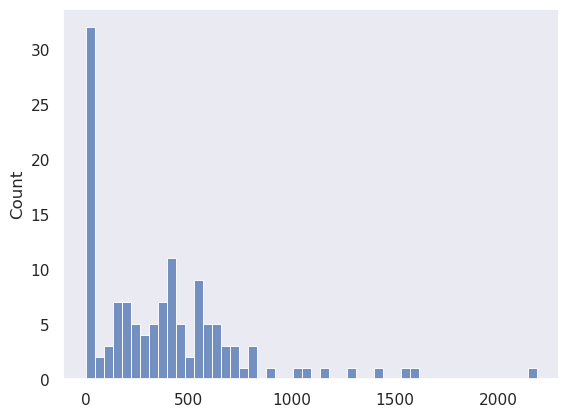

In [13]:
_ = sns.histplot(sent_lens1, bins=50)

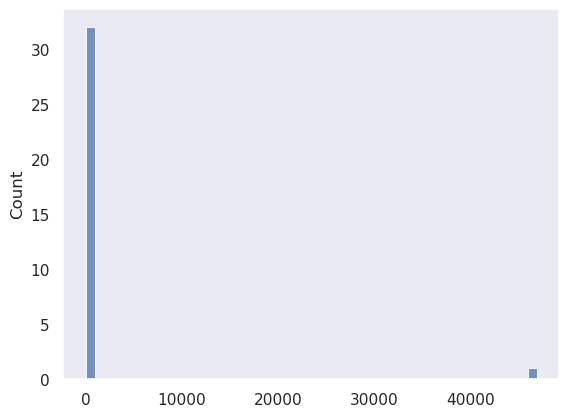

In [14]:
_ = sns.histplot(sent_lens2, bins=50)

In [15]:
ds = ds.map(
    lambda x: {"sentences": [s.split("\n\n") for s in x["text"]]},
    batched=True,
    num_proc=16,
    desc="Sentence Splitting",
)
print(ds)

Sentence Splitting (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences'],
    num_rows: 1219201
})

In [16]:
print(ds[0]["sentences"][0])

الماء مادةٌ شفافةٌ عديمة اللون والرائحة، وهو المكوّن الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع
الكائنات الحيّة، وهو أكثر المركّبات الكيميائيّة انتشاراً على سطح الأرض. يتألّف جزيء الماء من ذرّة أكسجين مركزية ترتبط بها
ذرّتا هيدروجين على طرفيها برابطة تساهميّة بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة
يكون الماء سائلاً؛ أمّا الحالة الصلبة فتتشكّل عند نقطة التجمّد، وتدعى بالجليد؛ أمّا الحالة الغازية فتتشكّل عند نقطة
الغليان، وتسمّى بخار الماء.

In [17]:
ds = ds.map(
    lambda x: {
        "sentences": [
            [strip_tashkeel(s.strip()) for s in art] for art in x["sentences"]
        ]
    },
    batched=True,
    num_proc=16,
    desc="Strip Tashkeel",
)
print(ds)

Strip Tashkeel (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences'],
    num_rows: 1219201
})

In [18]:
print(ds[0]["sentences"][0])

الماء مادة شفافة عديمة اللون والرائحة، وهو المكون الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في جميع
الكائنات الحية، وهو أكثر المركبات الكيميائية انتشارا على سطح الأرض. يتألف جزيء الماء من ذرة أكسجين مركزية ترتبط بها
ذرتا هيدروجين على طرفيها برابطة تساهمية بحيث تكون صيغته الكيميائية H2O. عند الظروف القياسية من الضغط ودرجة الحرارة 
يكون الماء سائلا؛ أما الحالة الصلبة فتتشكل عند نقطة التجمد، وتدعى بالجليد؛ أما الحالة الغازية فتتشكل عند نقطة 
الغليان، وتسمى بخار الماء.

In [21]:
# add space around punctuations
ds = ds.map(
    lambda x: {
        "sentences": [
            [re.sub(r"([^\w\s])", r" \1 ", s) for s in art] for art in x["sentences"]
        ]
    },
    batched=True,
    num_proc=16,
    desc="Space-Pad Punctuations",
)
print(ds)

Space-Pad Punctuations (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences'],
    num_rows: 1219201
})

In [22]:
print(ds[0]["sentences"][0])

الماء مادة شفافة عديمة اللون والرائحة ،  وهو المكون الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في 
جميع الكائنات الحية ،  وهو أكثر المركبات الكيميائية انتشارا على سطح الأرض .  يتألف جزيء الماء من ذرة أكسجين مركزية 
ترتبط بها ذرتا هيدروجين على طرفيها برابطة تساهمية بحيث تكون صيغته الكيميائية H2O .  عند الظروف القياسية من الضغط 
ودرجة الحرارة يكون الماء سائلا ؛  أما الحالة الصلبة فتتشكل عند نقطة التجمد ،  وتدعى بالجليد ؛  أما الحالة الغازية 
فتتشكل عند نقطة الغليان ،  وتسمى بخار الماء .

In [23]:
# replace multiple white spaces with only one
ds = ds.map(
    lambda x: {
        "sentences": [[re.sub(r" +", " ", s) for s in art] for art in x["sentences"]]
    },
    batched=True,
    num_proc=16,
    desc="One-Space",
)
print(ds)

One-Space (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences'],
    num_rows: 1219201
})

In [24]:
print(ds[0]["sentences"][0])

الماء مادة شفافة عديمة اللون والرائحة ، وهو المكون الأساسي للجداول والبحيرات والبحار والمحيطات وكذلك للسوائل في 
جميع الكائنات الحية ، وهو أكثر المركبات الكيميائية انتشارا على سطح الأرض . يتألف جزيء الماء من ذرة أكسجين مركزية 
ترتبط بها ذرتا هيدروجين على طرفيها برابطة تساهمية بحيث تكون صيغته الكيميائية H2O . عند الظروف القياسية من الضغط 
ودرجة الحرارة يكون الماء سائلا ؛ أما الحالة الصلبة فتتشكل عند نقطة التجمد ، وتدعى بالجليد ؛ أما الحالة الغازية 
فتتشكل عند نقطة الغليان ، وتسمى بخار الماء .

In [25]:
ds = ds.map(
    lambda x: {"sentences_length": [[len(s) for s in art] for art in x["sentences"]]},
    batched=True,
    num_proc=16,
    desc="Calc Sents Lengths",
)
print(ds)

Calc Sents Lengths (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences', 'sentences_length'],
    num_rows: 1219201
})

In [26]:
sent_lens = []
for sl in ds["sentences_length"]:
    sent_lens.extend(sl)

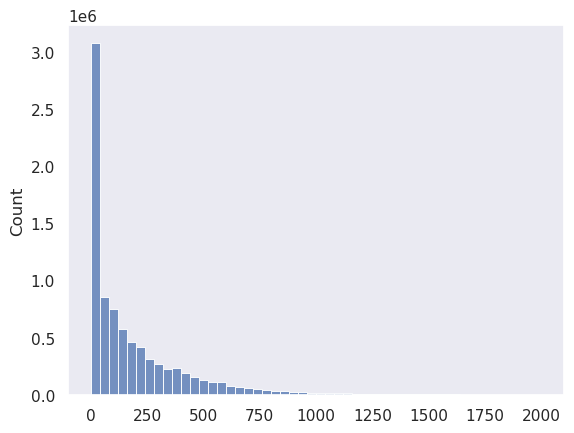

In [27]:
_ = sns.histplot(sent_lens, binrange=(0, 2000), bins=50)

In [28]:
min(sent_lens), max(sent_lens)

(0, 223053)

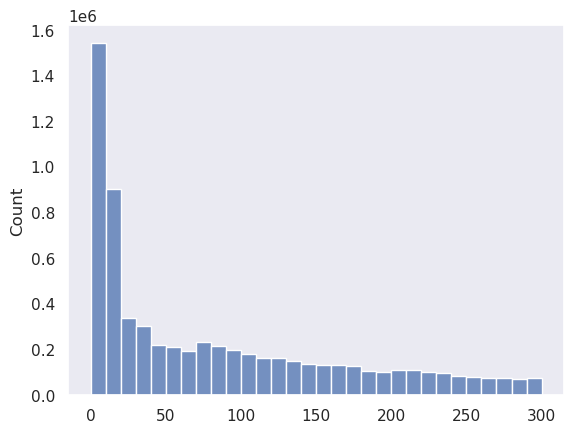

In [29]:
_ = sns.histplot(sent_lens, binrange=(0, 300), bins=30)

In [30]:
print(f"Number of sentences: {len(sent_lens)}")

Number of sentences: 8465737

In [31]:
# Filter sentences that are less than 60 characters and more than 1250 characters


def filter_sentences(batch):
    sentences = []
    sents, lengths = batch["sentences"], batch["sentences_length"]
    for s, l in zip(sents, lengths):
        sentences.append([s_ for s_, l_ in zip(s, l) if 60 <= l_ <= 1250])
    return {"sentences": sentences, "num_sentences": [len(art) for art in sentences]}


ds = ds.map(
    filter_sentences,
    batched=True,
    num_proc=16,
    remove_columns=["sentences_length"],
    desc="Filter Sentences",
)
print(ds)

Filter Sentences (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences', 'num_sentences'],
    num_rows: 1219201
})

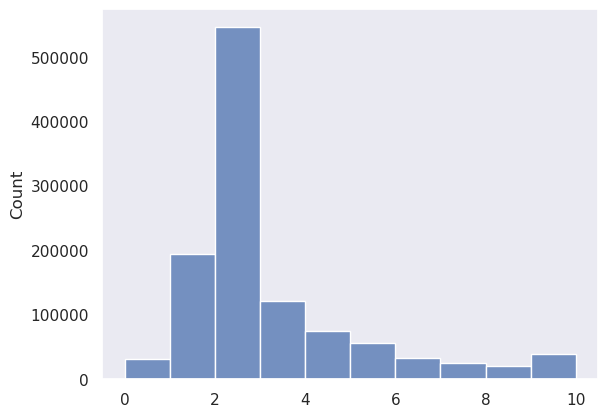

In [32]:
# number of sentences per article
_ = sns.histplot(ds["num_sentences"], bins=10, binrange=(0, 10))

In [33]:
min(ds["num_sentences"]), max(ds["num_sentences"])

(0, 515)

In [34]:
# filter articles with no sentences
ds = ds.filter(
    lambda x: [num_sents != 0 for num_sents in x["num_sentences"]],
    batched=True,
    num_proc=16,
)
print(ds)

Filter (num_proc=16):   0%|          | 0/1219201 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'sentences', 'num_sentences'],
    num_rows: 1188036
})

In [35]:
sentences = []
for art in ds["sentences"]:
    sentences.extend(art)

In [36]:
sentences = pd.DataFrame.from_dict({"text": sentences})

In [37]:
sentences.to_csv("../data/wikipeda.csv", index=False)